In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train[8794]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 134,
        253, 255, 253, 253, 213,  36,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

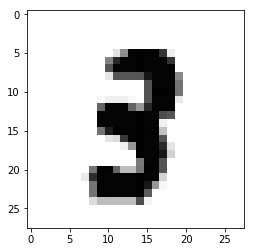

In [7]:
plt.imshow(x_train[8794], cmap='Greys')

In [8]:
y_train[8794]

3

In [9]:
x_train[8794].shape

(28, 28)

In [10]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [11]:
x_train[8794].shape

(784,)

In [12]:
from keras.utils import np_utils

In [13]:
y_train = np_utils.to_categorical(y_train, 10)

In [14]:
y_test = np_utils.to_categorical(y_test, 10)

In [15]:
y_train[8794]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD

In [17]:
model_1 = Sequential()

In [18]:
model_1.add(Dense(4, input_dim=784))
model_1.add(Activation('sigmoid'))

In [19]:
model_1.add(Dense(2))
model_1.add(Activation('sigmoid'))

In [20]:
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

In [21]:
model_1.compile(loss = 'mse',
               optimizer = SGD(lr=0.087),
               metrics = ['accuracy'])

In [22]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_1_20 = model_1.fit(x_train, y_train,
                        batch_size=100,
                        epochs=20,
                        verbose=1,
                        validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.0901 - acc: 0.1290 - val_loss: 0.0901 - val_acc: 0.1269
Epoch 2/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.0900 - acc: 0.1379 - val_loss: 0.0899 - val_acc: 0.1358
Epoch 3/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.0898 - acc: 0.1484 - val_loss: 0.0896 - val_acc: 0.1488
Epoch 4/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.0895 - acc: 0.1575 - val_loss: 0.0895 - val_acc: 0.1582
Epoch 5/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.0894 - acc: 0.1633 - val_loss: 0.0893 - val_acc: 0.1590
Epoch 6/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0893 - acc: 0.1602 - val_loss: 0.0892 - val_acc: 0.1583
Epoch 7/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.0891 - acc: 0.1551 - val_loss: 0.0890 - val_acc

In [24]:
from ipywidgets import interact_manual

In [25]:
predict = model_1.predict_classes(x_test)

In [26]:
model_1.predict(x_test)[0]

array([0.07541305, 0.11840148, 0.07923735, 0.07849374, 0.1509784 ,
       0.06434848, 0.12912458, 0.12454115, 0.08037505, 0.09908672],
      dtype=float32)

In [27]:
def test(num):
    plt.imshow(x_test[num].reshape(28, 28), cmap='Greys')
    print('神經網路判斷為', predict[num])

In [28]:
interact_manual(test, num = (0, 9999))

interactive(children=(IntSlider(value=4999, description='num', max=9999), Button(description='Run Interact', s…

<function __main__.test(num)>

In [29]:
score = model_1.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 10us/step


In [30]:
score

[0.08676463522911072, 0.2405]

In [31]:
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1])

測試資料的 loss: 0.08676463522911072
測試資料正確率: 0.2405


In [32]:
# normalized
x_train_1 = x_train / x_train.max()
x_test_1 = x_test / x_test.max()

In [33]:
x_train_1.max()

1.0

In [34]:
x_train_2 = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_2 = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [35]:
x_train_2.max()

1.0

In [36]:
model_2 = Sequential()
model_2.add(Dense(4, input_dim=784))
model_2.add(Activation("sigmoid"))
model_2.add(Dense(2))
model_2.add(Activation("sigmoid"))
model_2.add(Dense(10))
model_2.add(Activation("softmax"))
model_2.compile(loss = 'mse', 
              optimizer = SGD(lr=0.05),
              metrics = ["accuracy"])
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_4 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_5 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_2_20 = model_2.fit(x_train_1, y_train,
                        batch_size = 100,
                        epochs = 20,
                        verbose = 1,
                        validation_data = (x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 13us/step - loss: 0.0907 - acc: 0.0903 - val_loss: 0.0906 - val_acc: 0.0892
Epoch 2/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0905 - acc: 0.0903 - val_loss: 0.0905 - val_acc: 0.0892
Epoch 3/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0904 - acc: 0.0904 - val_loss: 0.0903 - val_acc: 0.0892
Epoch 4/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0903 - acc: 0.0904 - val_loss: 0.0902 - val_acc: 0.0892
Epoch 5/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.0902 - acc: 0.0960 - val_loss: 0.0902 - val_acc: 0.1021
Epoch 6/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0901 - acc: 0.1261 - val_loss: 0.0901 - val_acc: 0.1306
Epoch 7/20
60000/60000 [==============================] - 1s 11us/step - loss: 0.0900 - acc: 0.1475 - val_loss: 0.0900 - val_acc

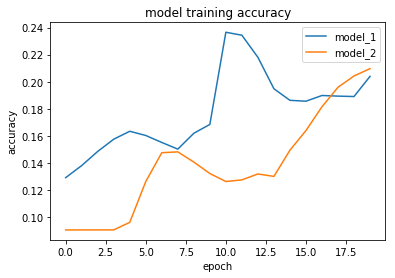

In [39]:
plt.plot(model_1_20.history['acc'])
plt.plot(model_2_20.history['acc'])

plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model_1', 'model_2'], loc = 'best')
plt.show()

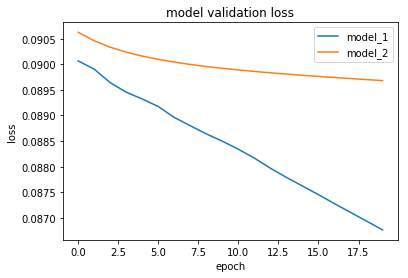

In [40]:
plt.plot(model_1_20.history['val_loss'])
plt.plot(model_2_20.history['val_loss'])

plt.title('model validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model_1', 'model_2'], loc = 'best')
plt.show()

# Activation function